### Importing the essential libraries

In [79]:
# to remove warnings
import warnings
warnings.filterwarnings("ignore")
# for uploading csv files
import io
# for data analysis and wrangling
import numpy as np
import pandas as pd
# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.style as style
# for statistics
from scipy import stats
# for label encoding
from sklearn.preprocessing import LabelEncoder
# for fixing oversampling
from imblearn.over_sampling import SMOTE
# scikit-learn libraries for building and evaluating the model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [80]:
from google.colab import files
uploaded_1 = files.upload()

Saving train_LZdllcl.csv to train_LZdllcl (1).csv


In [81]:
uploaded_2 = files.upload()

Saving test_2umaH9m.csv to test_2umaH9m (2).csv


### Exploratory Data Analysis/Story Building

In [82]:
train = pd.read_csv(io.BytesIO(uploaded_1["train_LZdllcl.csv"]))
train # viewing the train dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [83]:
test = pd.read_csv(io.BytesIO(uploaded_2["test_2umaH9m.csv"]))
test # viewing the test dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [84]:
train.head() # viewing the first 5 rows of train dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [85]:
test.head() # viewing the first 5 rows of test dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [86]:
print(train.isnull().sum()) # checking the null values in train dataset

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [87]:
print(test.isnull().sum()) # checking the null values in test dataset

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [88]:
train.info() # getting general information on the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [89]:
test.info() # getting general information on the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [90]:
# checking for numerical and categorical nature of columns in train dataset
print("Unique values in 'department' column: ", train['department'].unique())
print("\nUnique value counts for 'department' column:", train['department'].value_counts().unique())
print("\nValue counts for 'department' column: ", train['department'].value_counts())
# 'department' is categorical in nature

Unique values in 'department' column:  ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Unique value counts for 'department' column: [16840 11348  7138  5352  2536  2418  1039   999]

Value counts for 'department' column:  Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


In [91]:
print(train['avg_training_score'].value_counts())  # numerical in nature

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64


In [92]:
print(train['awards_won?'].value_counts()) #categorical in nature

0    53538
1     1270
Name: awards_won?, dtype: int64


In [93]:
print(train['KPIs_met >80%'].value_counts()) # numerical in nature

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


In [94]:
print(train['length_of_service'].value_counts()) # numerical in nature

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64


In [95]:
print(train['age'].value_counts()) #numerical in nature

30    3665
32    3534
31    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
48     557
47     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64


In [96]:
print("\nValue counts for 'recruitment_channel' column: ", train['recruitment_channel'].value_counts()) #categorical in nature


Value counts for 'recruitment_channel' column:  other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64


In [97]:
print(train['gender'].value_counts()) #categorical in nature

m    38496
f    16312
Name: gender, dtype: int64


In [98]:
print(train['region'].value_counts()) #categorical in nature

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64


In [99]:
print(train['previous_year_rating'].value_counts()) # numerical in nature

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [100]:
print(train['education'].value_counts()) # categorical in nature

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


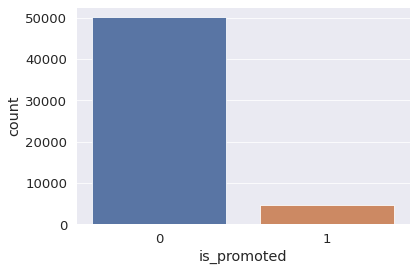

In [101]:
# visualisation starts from here
sns.countplot(train.is_promoted)
plt.savefig('is_promoted.png')
# observation: most of them aren't promoted

In [102]:
# deleting 'employee_id' from both datasets as it isn't relevant now
del train['employee_id']
del test['employee_id']

In [103]:
# separating and printing out categorical and numerical columns in train dataset
cats = [c for c in train.columns if train[c].dtypes=='object']
nums = [c for c in train.columns if c not in cats]
print(cats)
print(nums)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [104]:
# storing all the true categorical columns in true_cat
true_cats = ['department', 'region', 'education', 'gender', 'recruitment_channel','awards_won?', 
             'previous_year_rating','length_of_service', 'no_of_trainings']

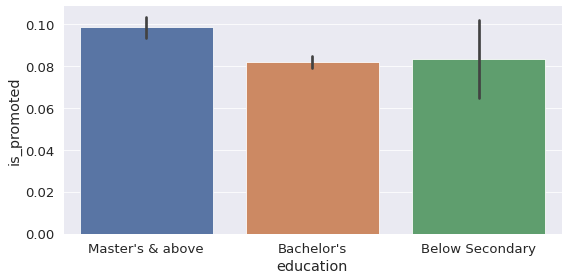

In [105]:
sns.catplot(x="education", y="is_promoted", kind="bar", data=train, height=4, aspect=2)
# observation: most of the people who are promoted are mostly master's holders

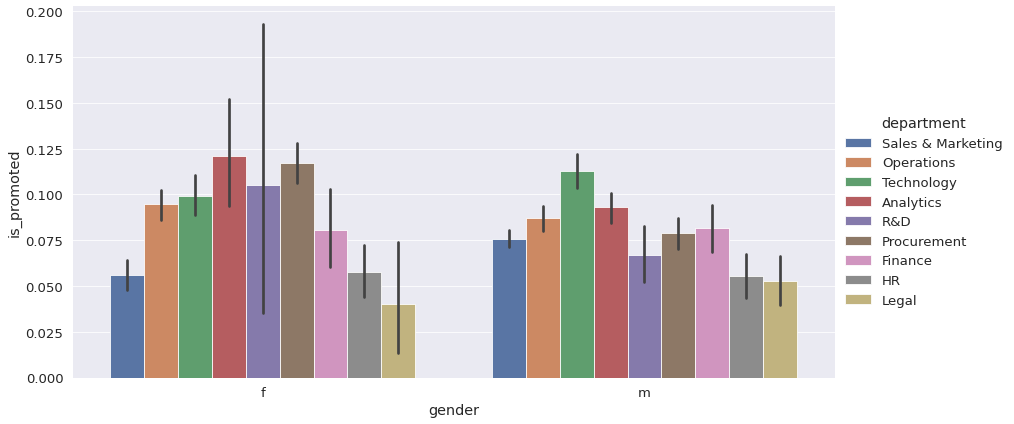

In [106]:
sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=train, height=6, aspect=2)
# observation: much females from analytics are promoted, whereas males are promoted from technology but unfortunately, both of them lag in Legal department.

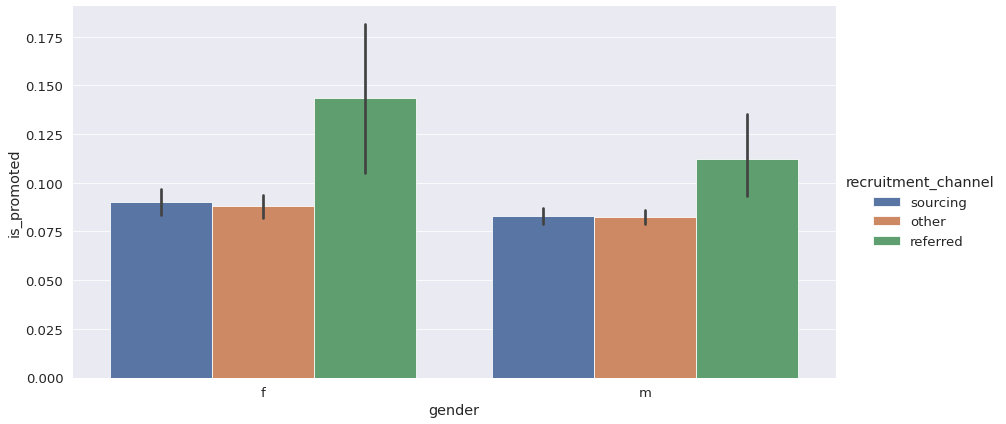

In [107]:
sns.catplot(x="gender", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=2)
# observation: men and women who joined the company by referrals are promoted a lot than sourcing and other recruitment channels with more than 10%.

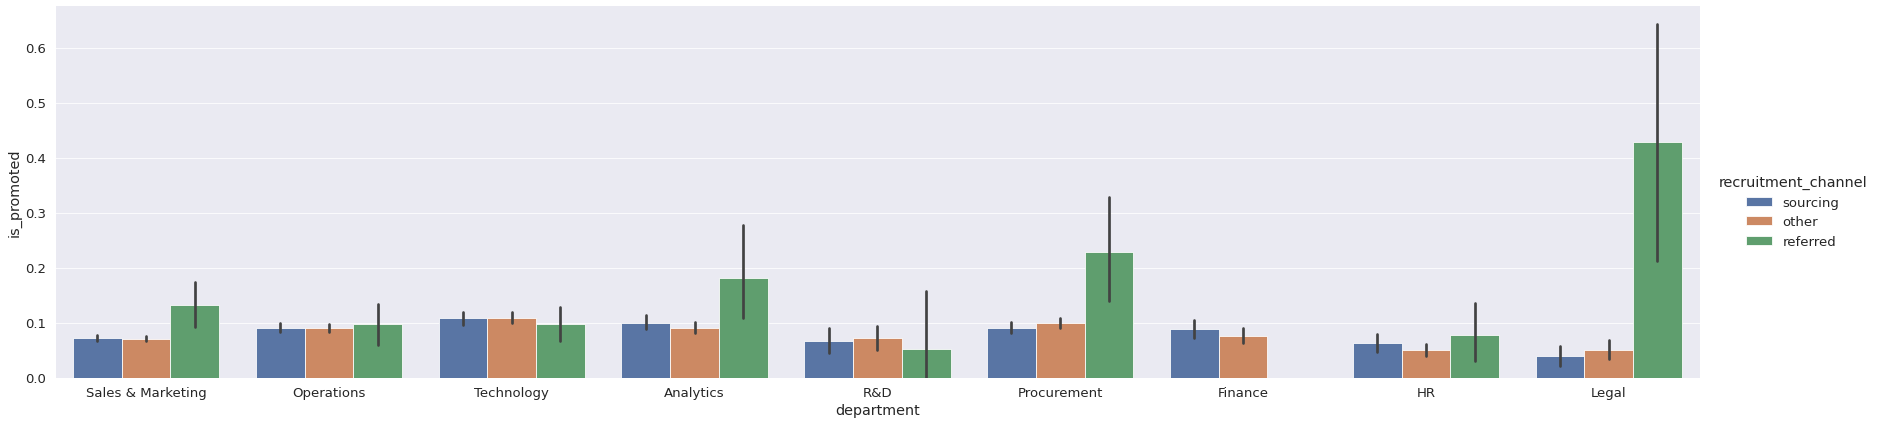

In [108]:
sns.catplot(x="department", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=4)
# observation: people from legal, sales, analytics, procurement and HR department is usually promoted who were hired by referrals but this trend isn't favourable in operations, technology, R&D and negligible in Finance.

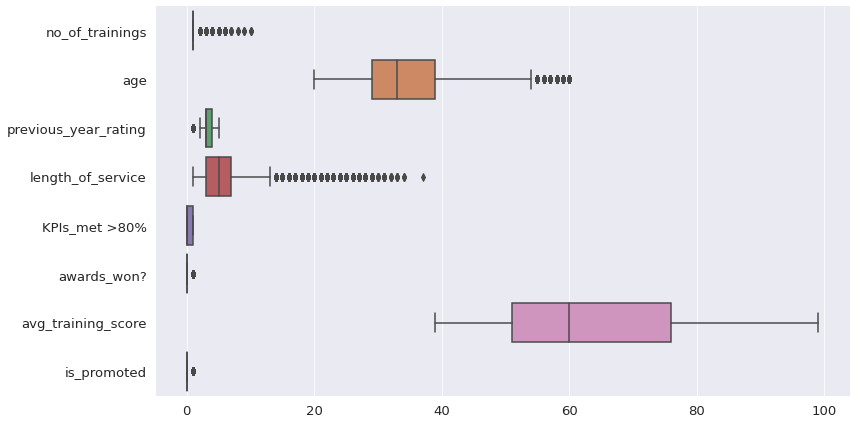

In [109]:
sns.catplot(data=train, orient="h", kind="box", height=6, aspect=2)
# observation: length of service is highly full of outliers with no of trainings and age, meaning, these categories aren't balanced in the company.

In [110]:
true_nums = [c for c in train.columns if c not in true_cats]
true_nums.remove('is_promoted')

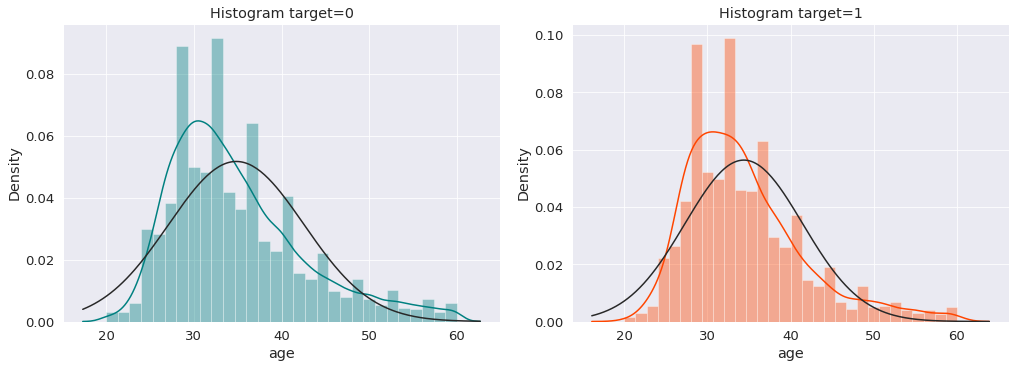

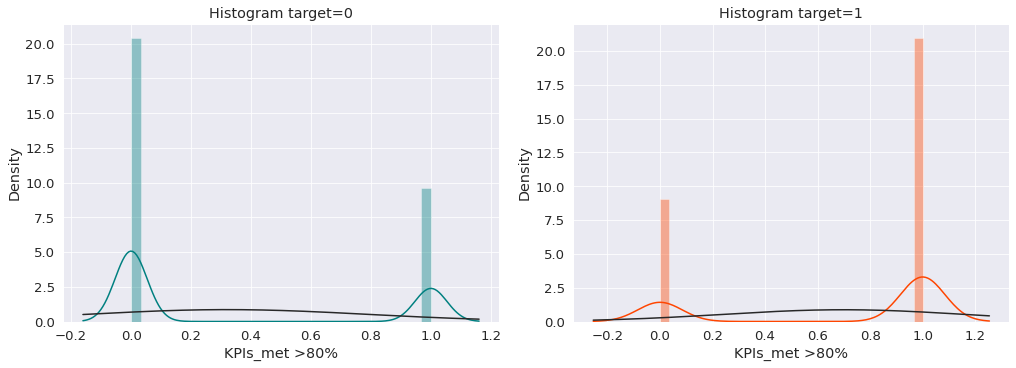

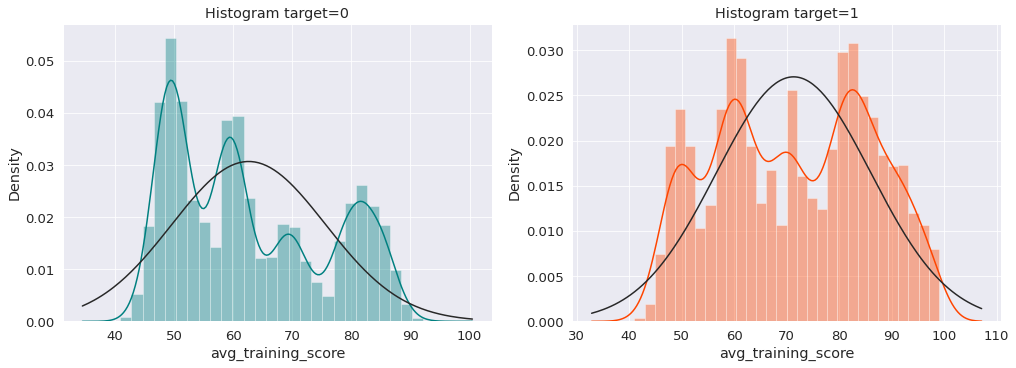

In [111]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    
    fig = plt.figure(constrained_layout=True, figsize=(14,5))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram target=0')
    sns.distplot(train[train.is_promoted==0].loc[:,c].dropna(),bins=30, fit=norm, norm_hist
                 =True,color='teal' , ax = ax1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Histogram target=1')
    sns.distplot(train[train.is_promoted==1].loc[:,c].dropna(), bins=30, fit=norm, norm_hist
                 =True,color='orangered' , ax = ax2)

In [112]:
missingtr = train.isnull().sum()
missingtr[missingtr>0]

education               2409
previous_year_rating    4124
dtype: int64

In [113]:
missingts = test.isnull().sum()
missingts[missingts>0]

education               1034
previous_year_rating    1812
dtype: int64

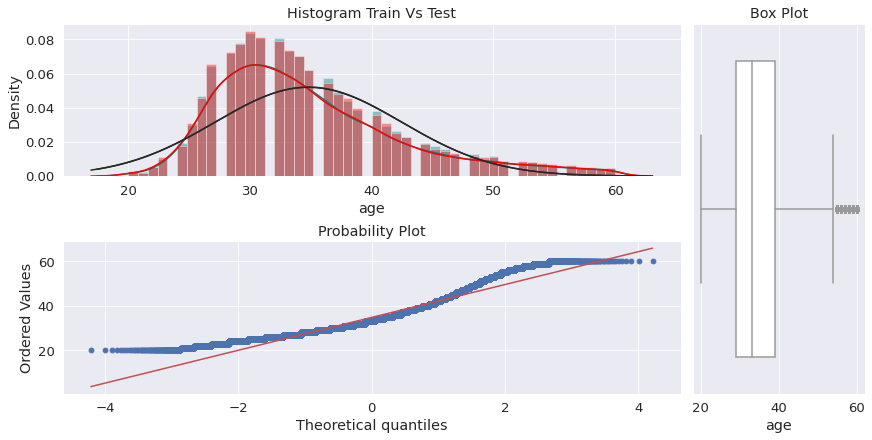

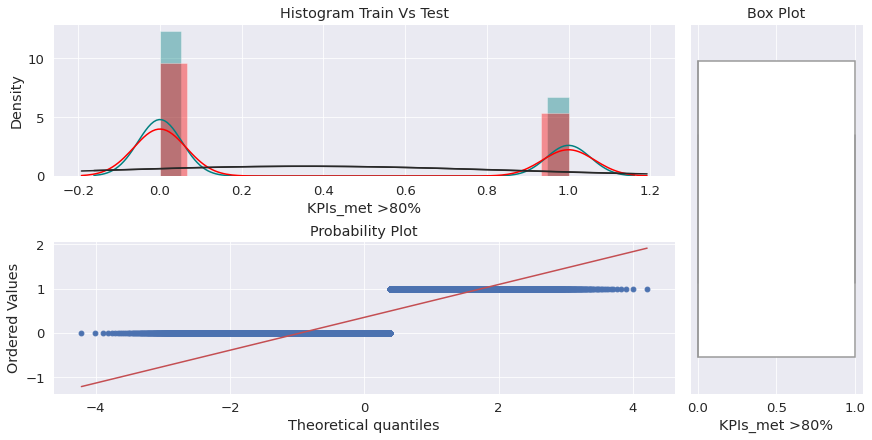

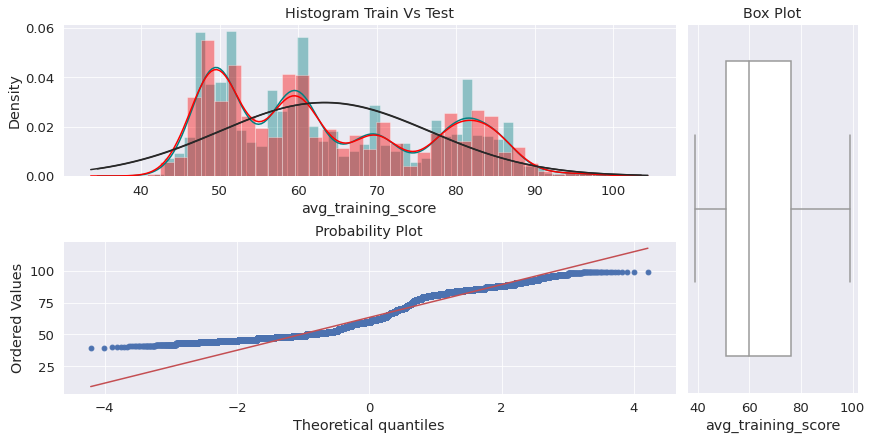

In [114]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram Train Vs Test')
    ## plot the histogram. 
    sns.distplot(train.loc[:,c].dropna(),fit=norm, norm_hist=True,color='teal' , ax = ax1)
    sns.distplot(test.loc[:,c].dropna(),  fit=norm, norm_hist=True,color='red' , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,c].dropna(), plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(train.loc[:,c].dropna(), orient='v', ax = ax3, color='white' );

In [115]:
train = train[train.length_of_service<30] ##outliers

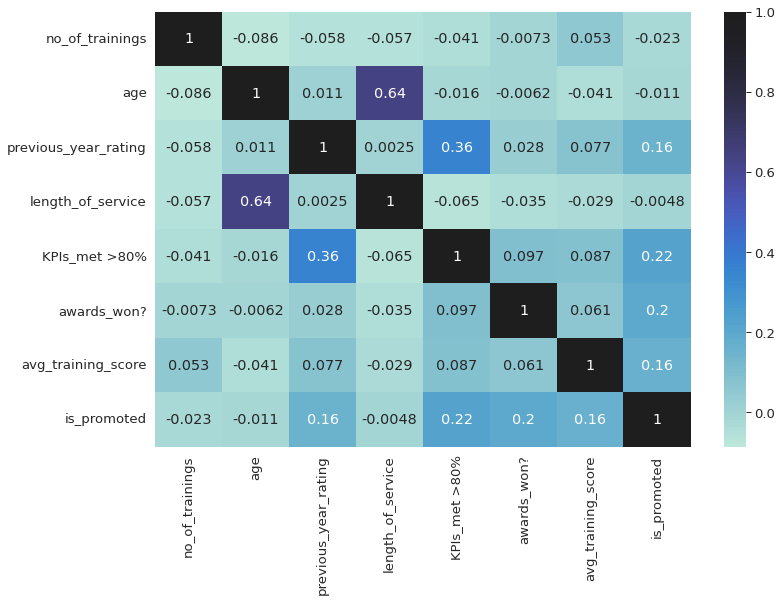

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(train, columns=train.columns).corr(method = 'spearman'), annot=True, center=True)

### Data Preprocessing

In [117]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [118]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Testing Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Testing Data : 0


In [119]:
print(train.isnull().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


In [120]:
print(test.isnull().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


### Outliers detection

In [121]:
train.select_dtypes('number').head()      # here, all the columns with numberic  data_types are printed.

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0


In [122]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] > 13]
print(train)

              department     region         education gender  \
13            Technology  region_29  Master's & above      m   
42                    HR   region_2        Bachelor's      m   
60     Sales & Marketing   region_4  Master's & above      m   
74     Sales & Marketing   region_7        Bachelor's      m   
99               Finance   region_2  Master's & above      m   
...                  ...        ...               ...    ...   
54691          Analytics   region_2  Master's & above      m   
54695         Operations   region_2        Bachelor's      f   
54697  Sales & Marketing   region_2        Bachelor's      m   
54754         Technology  region_26        Bachelor's      f   
54803         Technology  region_14        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
13                  other                2   39                   3.0   
42               sourcing                1   59                   4.0   
60          

## Feature Selection and Engineering

In [123]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?'] + train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [124]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region'], axis = 1)
test = test.drop(['recruitment_channel', 'region'], axis = 1)

# lets check the columns in train and test data set after feature engineering
print(train.columns)

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')


In [125]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

print(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)])

Empty DataFrame
Columns: [department, education, gender, no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met >80%, awards_won?, avg_training_score, is_promoted, sum_metric, total_score]
Index: []


In [126]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (3433, 13)
After Deletion of the above two rows : (3433, 13)


### Dealing with categorical variables

In [127]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [128]:
# lets check the value counts for the education column
print(train['education'].value_counts())

Master's & above    1727
Bachelor's          1706
Name: education, dtype: int64


In [129]:
#encoding
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [130]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47


### Splitting the data

In [131]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3433, 12)
Shape of the y : (3433,)
Shape of the x Test : (23490, 12)


### Resampling

In [132]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6404, 12)
(6404,)


In [133]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3202
1     231
Name: is_promoted, dtype: int64
After Resampling :
0    3202
1    3202
Name: 0, dtype: int64


In [134]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (4482, 12)
Shape of the y Train : (4482, 1)
Shape of the x Valid : (1922, 12)
Shape of the y Valid : (1922, 1)
Shape of the x Test : (23490, 12)


Feature Scaling

In [135]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Model Development, Model Selection, Model tuning

In [136]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 3, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'f1')
    results.append(cv_results)
    names.append(name)
    print('%s: %f ' % (name, cv_results.mean()))

LR: 0.774758 
LDA: 0.782637 
KNN: 0.895172 
DT: 0.950981 
GNB: 0.753277 
SVM: 0.882813 


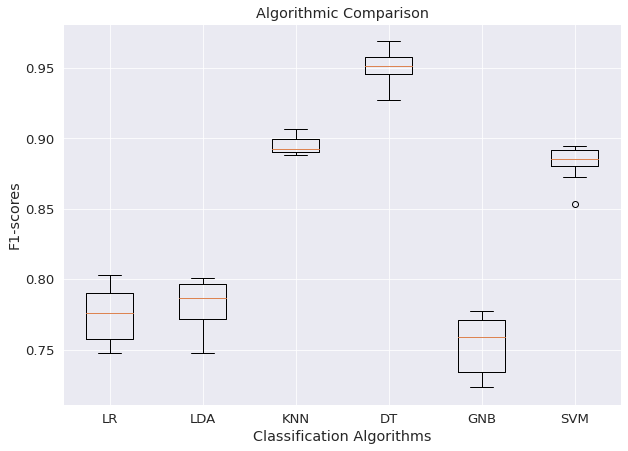

In [137]:
# Compare Algorithms
plt.figure(figsize = (10, 7))
plt.boxplot(results, labels = names)
plt.xlabel('Classification Algorithms')
plt.ylabel('F1-scores')
plt.title('Algorithmic Comparison')
plt.show()

Decision Tree

In [138]:
# Lets use Decision Trees to classify the data
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

### Model Performance and Accuracy

Training Accuracy : 1.0
Testing Accuracy : 0.951092611862643


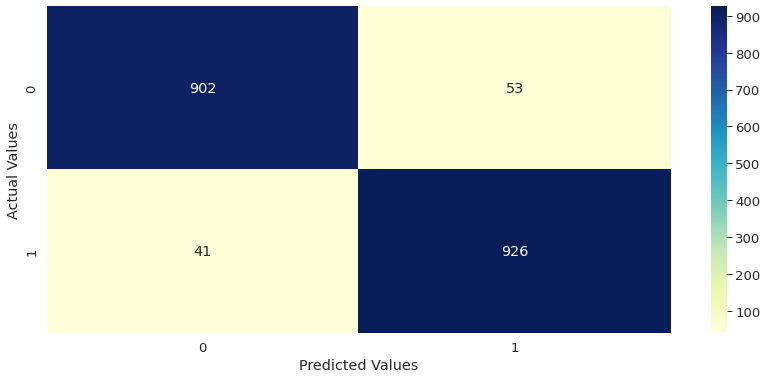

In [139]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [140]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       955
           1       0.95      0.96      0.95       967

    accuracy                           0.95      1922
   macro avg       0.95      0.95      0.95      1922
weighted avg       0.95      0.95      0.95      1922



In [141]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y1_pred = model.predict(x_test)
print(y1_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from google.colab import files
test1 = files.upload()
test_1 = pd.read_csv(io.BytesIO(test1["test_2umaH9m.csv"]))
test_1

In [ ]:
submission = pd.DataFrame({'employee_id': test_1['employee_id'] , 'is_promoted': y1_pred})
submission.to_csv('submission.csv', index = False)